Agenda of this project is a follows:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We have 2 datasets in the project namely, 
1. Exit surveys from employees of the Department of Education, Training and Employment (DETE)
2. Exit surveys from employees of the Technical and Further Education (TAFE) institute in Queensland, Australia

Dataset definitions, 
**DETE**
1. ID: An id used to identify the participant of the survey
2. SeparationType: The reason why the person's employment ended
3. Cease Date: The year or month the person's employment ended
4. DETE Start Date: The year the person began employment with the DETE
**TAFE**
1. Record ID: An id used to identify the participant of the survey
2. Reason for ceasing employment: The reason why the person's employment ended
3. LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
import numpy as np 
import pandas as pd
date_survey = pd.read_csv("dete_survey.csv", encoding = "UTF-8")
tafe_survey = pd.read_csv("tafe_survey.csv", encoding = "UTF-8")


In [2]:
date_survey.info()
date_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
date_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In a few cells, the values are entered as "Not Stated", it is easier to work with such cells if we renamed them as NulL.

In [6]:
dete_survey = pd.read_csv("dete_survey.csv", encoding = "UTF-8", na_values = "Not Stated")
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


removing columns from both dataframes that isn't necessary in our analysis.

In [7]:
remove_dete_cols = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(remove_dete_cols, axis = 1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
remove_tafe_cols = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(remove_tafe_cols, axis =1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(" ","_").str.lower()
dete_survey_updated.columns
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
renamed_columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date',
                   'Reason for ceasing employment': 'separationtype',
                  'Gender. What is your Gender?': 'gender',
                  'CurrentAge. Current Age': 'age',
                  'Employment Type. Employment Type': 'employment_status',
                  'Classification. Classification': 'position',
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(renamed_columns, inplace = True, axis = 1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


As we are looking to answer **Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?**
We have pulled up the values in the *separationtype* column. 

In [11]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
pattern = r"Resignation."
a = dete_survey_updated["separationtype"].str.contains(pattern)
dete_resignations = dete_survey_updated[a].copy()
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


To answer our question , we have isolated the case where the employees resign in both the datasets.

In [14]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [15]:
# dete_resignations["cease_date"].value_counts()
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str.get(-1).astype("float")
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

None of the dates seem out of the oridinary, so we do not need to reconsider removing them from the list 

In [16]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [17]:
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [18]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"]

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

Calculating the years of service in the **DELE** dataset.

In [19]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

In [20]:
tafe_resignations['dissatisfied'] = tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [21]:
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
                   "dissatisfaction_with_the_department",
                   "physical_work_environment",
                   "lack_of_recognition",
                   "lack_of_job_security",
                   "work_location",
                   "employment_conditions",
                   "work_life_balance","workload"]].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [22]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index = True)

In [23]:
combined_updated = combined.dropna(thresh = 500, axis = 1)

Combined the 2 datasets and removed values with majority(500 or more) values null

In [24]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype("str").str.replace("Less than 1 year","1").str.replace("More than 20 years","20").str.strip().str.split("-").str.get(-1)
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype("float")
combined_updated['institute_service_up'].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


 1.0     95
NaN      88
 4.0     79
 2.0     78
 6.0     50
 20.0    43
 10.0    27
 5.0     23
 3.0     20
 0.0     20
 9.0     14
 7.0     13
 13.0     8
 8.0      8
 15.0     7
 14.0     6
 22.0     6
 17.0     6
 12.0     6
 16.0     5
 18.0     5
 24.0     4
 23.0     4
 11.0     4
 39.0     3
 21.0     3
 19.0     3
 32.0     3
 36.0     2
 30.0     2
 26.0     2
 25.0     2
 28.0     2
 42.0     1
 29.0     1
 35.0     1
 27.0     1
 41.0     1
 38.0     1
 49.0     1
 34.0     1
 33.0     1
 31.0     1
Name: institute_service_up, dtype: int64

In [25]:
def apply_experience(val):
    if val < 3:
        return "New"
    elif val <= 6:
        return "Experienced"
    elif val <= 10:
        return "Established"
    elif pd.isnull(val):
        return np.nan
    else:
        return "Veteran"

In [26]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(apply_experience)
combined_updated["service_cat"].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Grouping years of experience into 4 catagories namely 
1. New (0-3 years experience)
2. Experienced (3-6 years experience) 
3. Established (7-10 years experience)
4. Veteran (over 11 years experience)

In [27]:
combined_updated["dissatisfied"].value_counts(dropna = False)
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


False    411
True     240
Name: dissatisfied, dtype: int64

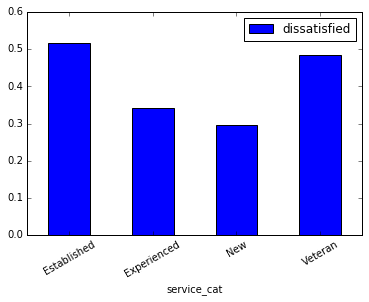

In [28]:
pivot_dissatisfied = combined_updated.pivot_table("dissatisfied", "service_cat", aggfunc = np.mean)
%matplotlib inline
pivot_dissatisfied.plot(kind = "bar",rot = 30)

It is evident from the plot above that Employyes who fall under the **Established** catagory tend to resign due to dissatisfaction, the followed by **Veteran**

In [29]:
# combined_updated['age_up'] = combined_updated["age"].str.replace("  ","-").str.split("-").str.get(-1).str.replace("20 or younger","20").str.replace(" or older","")
# combined_updated['age_up'] = combined_updated['age_up'].astype("float")
# combined_updated['age_up'].value_counts()
combined_updated['age'] = combined_updated["age"].astype(str).str.replace("  ", "-")
combined_updated['age'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
nan              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [38]:
def age_groups(val):
    if pd.isnull(val):
        return np.nan
    elif (val == "56-60" or val == "61 or older" or val =="56 or older"):
        return "56 years or older"
    else:
        return val

In [39]:
combined_updated["age_cat"] = combined_updated["age"].apply(age_groups)
combined_updated["age_cat"].value_counts(dropna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


41-45                93
46-50                81
56 years or older    78
36-40                73
51-55                71
26-30                67
21-25                62
31-35                61
nan                  55
20 or younger        10
Name: age_cat, dtype: int64

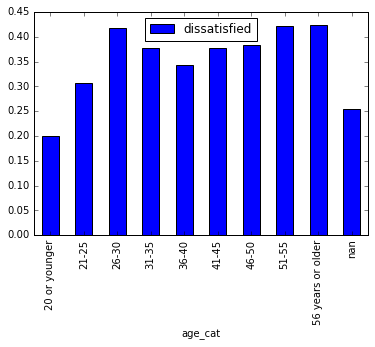

In [41]:
age_pivot  = combined_updated.pivot_table("dissatisfied", "age_cat")
age_pivot.plot(kind = "bar")

Modified the age column into different bins, will now create a pivot table and plot the graph

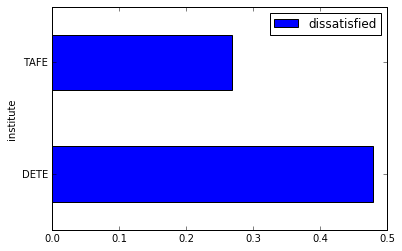

In [49]:
combined_updated["institute"].value_counts(dropna = False)

pivot_institute  = combined_updated.pivot_table("dissatisfied","institute") 
pivot_institute.plot(kind = "barh")

It is evident that the employees of DETE are far more dissatisfied than TAFE

Now let us look to answer the 2 questions that we set out to answer initially 
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

*It is very evident from our analysis and graphs that employees who have spent more time tend to resign due to dissatisfaction. Established and Veteran employees have the highest percentage of employees who tend to resign due to some sort of dissatisfaction.* 

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees? 

*Our graph between age and dissatisfaction would suggest that employees under the age of 20 are happy, but that is not a fair assumption to make as there only 10 sample. But otherwise the graph is pretty evenly distributed, so we cannot really conclude that age and dissatisfaction are related.*